# 🗣️ Voice Gender Recognition using Machine Learning

Objective:
The goal of this project is to build a machine learning model that can predict the gender (male or female) of a speaker based on various acoustic features extracted from their voice.

Dataset:
We use the "Gender Recognition by Voice" dataset from Kaggle, which contains 3,168 voice samples. Each sample is represented by 20 numerical features that describe different aspects of the voice frequency and waveform. The label column specifies the gender of the speaker as either "male" or "female".

Applications:

Voice assistants personalization

Telecommunication and speech analytics

Forensics and security

Demographic analysis in surveys

Approach:

Data preprocessing and normalization

Exploratory Data Analysis (EDA)

Encoding labels and splitting the data

Model training using classifiers like Logistic Regression, Random Forest, and SVM

Evaluation using accuracy, confusion matrix, and classification report

This project helps understand how voice frequency patterns differ by gender, and how ML models can effectively capture these patterns for classification.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
df=pd.read_csv("voice.csv")
df.head

<bound method NDFrame.head of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    

In [6]:
# Check shape
print("Dataset shape:", df.shape)

# Check data types and non-null values
df.info()

# Check basic statistics
df.describe()

df.isnull().sum()


Dataset shape: (3168, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  labe

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

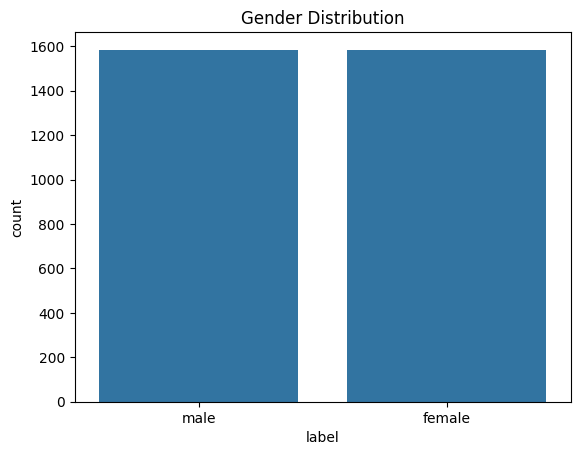

In [7]:
sns.countplot(data=df, x='label')
plt.title('Gender Distribution')
plt.show()


In [ ]:
plt.figure(figsize=(15,10))

# Drop the non-numeric 'label' column
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Feature Correlation Heatmap")
plt.show()


Data Preprocessing


In [21]:

# Encode labels first (0 = female, 1 = male)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # 0 = female, 1 = male

# Drop the original label column
df = df.drop(columns=['label'])

# Drop missing values if any
df = df.dropna()

# Separate features and labels
X = df.drop(columns=['label_encoded'])
y = df['label_encoded']

# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now shapes will match
print("Shape of X_scaled:", X_scaled.shape)
print("Length of y:", len(y))


Shape of X_scaled: (3168, 20)
Length of y: 3168


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)


In [26]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Female", "Male"]))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9810725552050473

Classification Report:
              precision    recall  f1-score   support

      Female       0.98      0.98      0.98       297
        Male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


Confusion Matrix:
[[292   5]
 [  7 330]]


In [27]:
train_accuracy = lr_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)



Training Accuracy: 0.973559589581689


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())



Cross-validation scores: [0.7318612  0.88485804 0.92271293 0.96682464 0.8957346 ]
Mean CV score: 0.8803982836724625
